# Learning Chapter 2 of `Statistics, data mining and machine learning in astronomy`

## Chapter 2: Fast computation on massive data sets

## 1. example: Sorting

In [1]:
import numpy as np

In [2]:
np.random.seed(0)

In [3]:
X = np.random.rand(10000000) # pick 10000000 random numbers
%time X.sort() 

CPU times: user 1.04 s, sys: 6.12 ms, total: 1.05 s
Wall time: 1.08 s


In [4]:
%time np.sort(X)

CPU times: user 183 ms, sys: 22.6 ms, total: 206 ms
Wall time: 209 ms


array([2.51678389e-08, 1.63714365e-07, 1.89048978e-07, ...,
       9.99999814e-01, 9.99999837e-01, 9.99999863e-01])

In [5]:
np.searchsorted(X, 0.5)

4998210

#### Python's built in `X.sort()` is much slower than NumPy's `np.sort()`. The reason why is that Numpy's function is writen in C, which is much faster than Python. It uses `quicksort`, an efficient algorithm for sorting. It chooses an element which is a 'pivot'. Then it rearranges the array so all the elements less than the pivot go on the left, and all the elements larger go on the right. This step is repeated untill everything is sorted. Also, Numpy stores its arrays in a contiguous block of emory, and not like Python which stores it somewhere else. As a final note, Numpy uses less memory which is why it's so efficient. 

#### Sorting by column

In [8]:
X = np.random.random((5,3))


In [9]:
np.set_printoptions(precision=2)
X

array([[0.25, 0.72, 0.35],
       [0.15, 0.95, 0.27],
       [0.49, 0.76, 0.52],
       [0.42, 0.71, 0.63],
       [0.98, 0.35, 0.61]])

In [12]:
i_sort = np.argsort(X[:, 0]) # sorts the first column by size
X[i_sort]

array([[0.15, 0.95, 0.27],
       [0.25, 0.72, 0.35],
       [0.42, 0.71, 0.63],
       [0.49, 0.76, 0.52],
       [0.98, 0.35, 0.61]])

In [13]:
i_sort = np.argsort(X[:, 1]) # sorts the second column by size
X[i_sort]

array([[0.98, 0.35, 0.61],
       [0.42, 0.71, 0.63],
       [0.25, 0.72, 0.35],
       [0.49, 0.76, 0.52],
       [0.15, 0.95, 0.27]])

In [14]:
i_sort = np.argsort(X[1, 2]) # sorts the first row by size
X[i_sort]

array([[0.25, 0.72, 0.35]])

In [15]:
i_sort = np.argsort(X[:, 0]) # sorts the first column by size
X[i_sort]

array([[0.15, 0.95, 0.27],
       [0.25, 0.72, 0.35],
       [0.42, 0.71, 0.63],
       [0.49, 0.76, 0.52],
       [0.98, 0.35, 0.61]])

In [16]:
X.sort(0)

In [18]:
X # all of the columns are now ordered by size based on the first column

array([[0.15, 0.35, 0.27],
       [0.25, 0.71, 0.35],
       [0.42, 0.72, 0.52],
       [0.49, 0.76, 0.61],
       [0.98, 0.95, 0.63]])

## Example 2: Near neighbor search

### Version 1: brute force

In [19]:
def easy_nns(X): # input is a 2D object (matrix)
    N, D = X.shape # N is number of datapoints and D number of dimensions
    neighbors = np.zeros(N, dtype=int) # creates an array which will
    # store the indices of closest neighbors of each datapoint 
    for i in range(N): # for every data point in the dataset
        j_closest = i # initializes the current data point
        d_closest = np.inf # initialize closest distance to infinity
        # this represents the closest distance encountered so far
        for j in range(N): # every other data point other than i
            if i == j:
                continue # skip distance between a point and itself!!
            d = np.sqrt(np.sum((X[i] - X[j])**2)) # euclidian metric
            if d < d_closest: # if a closer neighbor is found, update it
                j_closest = j
                d_closest = d
        neighbors[i] = j_closest # assigns the index of the closest neighbor
        # for the current data point i
    return neighbors

In [26]:
np.random.seed(0)
X = np.random.random((10,3)) # 10 points in 3 dimensions
easy_nns(X)

array([3, 7, 6, 0, 3, 1, 2, 1, 3, 7])

In [27]:
X = np.random.random((1000,3))
%time
easy_nns(X)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


array([410, 806, 455, 686, 373, 934,  62, 553, 604, 912,   8, 228, 586,
       901, 768, 150, 302, 184, 153, 758, 763, 199, 214, 717, 445, 405,
        85,  96, 412, 298, 932, 544, 269, 748, 530,  25, 602, 712, 856,
       517,  87, 641, 416, 304, 203, 300, 898, 961, 946, 626, 910, 326,
        35, 103, 873, 449, 120, 574,  94, 116, 637, 809,   6, 968, 341,
        66, 650, 256, 360, 751, 206, 304, 395, 189, 409, 719, 347, 345,
       415, 599, 507, 646, 548, 357, 670,  13, 468,  40, 395, 963, 456,
       370, 723, 299,  58, 690,  27, 681, 503, 547, 798, 623,  95, 585,
       799, 953, 691, 328, 715, 276, 326, 759, 801, 651, 904, 971,  59,
       178, 538, 911,  91, 355, 514, 377, 500, 627, 430, 264, 565,  58,
       149, 910, 584, 688, 131, 871, 955, 447, 738, 594, 940, 761,   4,
       781, 984, 361, 766, 532, 246, 130, 403, 878, 509, 877, 819, 211,
       912, 818, 420, 200, 442, 443, 190, 733, 539, 240, 869, 260,   8,
       883,  75, 752, 969, 948, 680, 200, 760, 500, 117, 429, 66

### Version 2: vectorized operations

In [29]:
def vectorized_nns(X):
    XXT = np.dot(X, X.T) # dot product between X and X.T 
    Xii = XXT.diagonal() # extracts the diagonal elements of the dot product
    # these products are squares!!

    # euclidian metric
    D = np.sqrt(Xii - 2*XXT + Xii[:, np.newaxis]) # reshapes Xii into a column vector
    # allowing for broadcasting

    return np.argsort(D, axis=1)[:, 1]
    # indirect sort, extracts the second column which corresponds to the index of
    # the second closest neighbor, other than itself

In [30]:
X = np.random.random((10,3))
%time
vectorized_nns(X)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


array([3, 2, 1, 9, 9, 3, 0, 5, 9, 3])

In [31]:
X = np.random.random((1000,3))
%time
vectorized_nns(X)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


array([613, 424, 752, 315, 545,  74, 963, 279,  18, 766, 107, 911, 810,
       157, 804, 966, 329,  66, 324, 318, 487, 160, 458, 306, 738, 918,
       802, 350,  90, 758, 772, 127, 977,  81, 533, 897, 847, 549, 728,
       864, 649, 665, 396, 500, 120, 165, 394, 214, 585, 365, 539, 760,
       639, 779, 741, 906, 577, 312, 354, 394, 694, 487, 862, 877,  84,
       281,  17,  62,  97, 913, 104, 723, 974, 295,   5, 580, 509, 512,
       119, 240, 933, 753, 389, 524,  64, 299, 219, 277, 953, 201, 984,
       474, 851, 763, 669,  28, 458,  68, 899, 846, 818, 985, 393, 331,
       765, 201, 652,  10, 524, 277, 522, 544, 746, 417, 497, 374, 512,
       791, 561,  78,  44, 188, 932, 990, 678, 173, 421, 670, 667, 327,
       948, 840, 116, 880, 878, 471, 445, 768, 883, 960, 693, 605, 592,
       271, 223, 871, 290, 642, 596, 461, 387, 636, 794, 742, 843, 757,
       978, 860, 799, 507, 969, 350, 925,  99, 749,  45, 902, 521, 544,
       422, 948, 688, 160, 125, 838, 791, 783, 241, 781,  90, 46

### Method 3: Trees

In [33]:
from scipy.spatial import cKDTree
X = np.random.random((1000,3))
kdt = cKDTree(X) # build tree
kdt.query(X, k=2) # find 2 neighbors

(array([[0.  , 0.08],
        [0.  , 0.08],
        [0.  , 0.02],
        ...,
        [0.  , 0.05],
        [0.  , 0.08],
        [0.  , 0.03]]),
 array([[  0, 647],
        [  1,  65],
        [  2, 179],
        ...,
        [997, 127],
        [998, 669],
        [999, 594]]))

In [34]:
from sklearn.neighbors import BallTree
X = np.random.random((1000,3))
bt = BallTree(X)
bt.query(X, k=2)

(array([[0.  , 0.04],
        [0.  , 0.04],
        [0.  , 0.05],
        ...,
        [0.  , 0.02],
        [0.  , 0.08],
        [0.  , 0.08]]),
 array([[  0, 120],
        [  1, 320],
        [  2, 536],
        ...,
        [997, 941],
        [998, 613],
        [999, 739]]))

In [2]:
# importing all of the necessary libraries
import numpy as np
#import seaborn as sns
import pandas as pd
import scipy as sc
import random
import pickle

from matplotlib import pyplot as plt
from scipy.stats import norm

from astroML.utils.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

from ztfquery import lightcurve
from matplotlib import ticker

np.random.seed(42)
%matplotlib inline  

In [26]:
data = fetch_LINEAR_sample(data_home='../inputs') # fetching the data from astroML data library

In [3]:
import dask.dataframe as dd 
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
import threading
import os

In [23]:
def getZTFlightcurve(ra:float, 
                     dec:float, 
                     iD,
                     radius:float=3.0):
    """Defines a function for acessing the light curve data based on which area of the sky it should search

    Arguments:
        ra (float): rectascension coordinate of star
        dec (float): declination coordinate of star
        radius(float, default=3.0): how wide should the search radius be
    
    """
    try: 
        lcq = lightcurve.LCQuery() #this object is used to query for the data
        res = lcq.from_position(ra, dec, radius) 
        try:
            ZTFdata = res.data[['mjd', 'mag', 'magerr', 'catflags', 'filtercode']]
        except:
            print(f"Something went wrong when extracting DataFrame: {iD}")
            try:
                f = dd.ZTFdata['filtercode'].mode()[0].compute()
                ZTFdata = dd.ZTFdata.loc[ZTFdata['filtercode'] == f].compute()
            except:
                print(f"Something went wrong when filtering for filter: {iD}")
                try:
                    ZTFdata = dd.ZTFdata.loc[ZTFdata['catflags']< 32768].compute()
                except:
                    print(f"Something went wrong when filerting catflags: {iD}")
        finally:   
            ZTFdata = ZTFdata.drop(['catflags','filtercode'],axis=1)
    except:
        print(f"Something went wrong with finding the light curve: {iD}")
        ZTFdata = None
    return ZTFdata

In [24]:
def lc_access(iD):
    '''
    Defines a function for acessing the light curve data based on equatorial coordinates of the LINEAR dataset.

    Arguments:
        iD (integer): ID of every light curve in the LINEAR dataset
    '''
    StarAttributes = data.targets[iD]
    ra, dec = StarAttributes[3], StarAttributes[4]
    light = getZTFlightcurve(ra, dec, iD)
    return light

In [10]:
import os
num_cores = os.cpu_count()
num = [x for x in range(7010)]

In [19]:
num_cores

4

In [20]:
l = []
tup = (1, 2)
l.append(tup)
l

[(1, 2)]

In [21]:
l[0][0]

1

In [22]:
import sys
sys.path.insert(0,'../src/')
sys.path
from ZTF_data import lc_access

In [23]:
lightcurves1 = []

if __name__ == '__main__':
    lightcurves1 = []
    with ProcessPoolExecutor(max_workers=num_cores) as exe:
        exe.submit(lc_access,2)

        lightcurves1 = list(exe.map(lc_access, num))

In [24]:
len(lightcurves1)

10

In [40]:
lightcurves1[0][1]

,mjd,mag,magerr
0,58202.353634,16.516510,0.016864
1,58202.357454,16.517498,0.016866
2,58205.341262,16.568840,0.017013
3,58205.392616,17.055435,0.019523
4,58208.322326,16.585726,0.017066
...,...,...,...
2192,59272.303634,16.044613,0.014280
2193,59272.304097,16.037762,0.014258
2194,59324.245914,15.973496,0.014059
2195,59324.246389,15.962948,0.014028


In [17]:
np.save('../inputs/lightcurves1.npy', np.array(lightcurves1, dtype=object), allow_pickle=True)

In [3]:
a = np.load('../inputs/lightcurves1.npy', allow_pickle=True)
len(a)

7010

<ErrorbarContainer object of 3 artists>

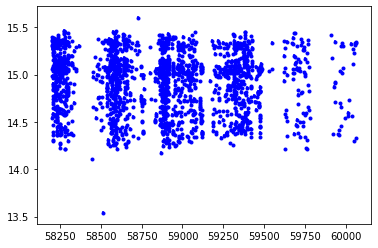

In [5]:
plt.errorbar(a[3]['mjd'],a[3]['mag'], yerr=a[3]['magerr'], fmt='.b', ecolor='b')

In [14]:
lightcurves1[1]

,mjd,mag,magerr
0,58236.343900,17.252327,0.020999
1,58236.344363,17.254246,0.021015
2,58246.288773,17.166143,0.020332
3,58246.289224,17.145496,0.020180
4,58482.536204,17.296938,0.021367
5,58507.492546,17.272144,0.021161
6,58522.449479,16.665062,0.017408
7,58538.414849,17.325613,0.021613
8,58540.386933,17.351080,0.021836
9,58567.404907,16.568600,0.016999


In [ ]:
from pathlib import Path
fnames = ['allLINEARfinal_dat.tar.gz', ]
DATA_DIR = Path('../input')

for f in fnames:
    #check whether the file name is in the directory
    # if so then read the data
    data = 
    # else
    # import

In [4]:
ZTF_data = np.load('../inputs/ZTF_curves.npy', allow_pickle=True)

In [7]:
ZTF_data[0][0]

0

In [67]:
n = [x for x in num if ZTF_data[x][0]==2101]

In [68]:
n

[2101]

In [69]:
ZTF_data[n]

array([[2101,                mjd        mag    magerr
              0     58203.492778  16.244103  0.016859
              1     58206.460069  15.790794  0.016660
              2     58206.508623  15.927025  0.016627
              3     58209.463704  16.317558  0.016985
              4     58229.465000  16.286766  0.016929
              ...            ...        ...       ...
              1058  58674.227500  15.529671  0.010703
              1059  58674.227951  15.523006  0.010696
              1060  58972.368958  15.978061  0.011290
              1061  58998.263507  15.945532  0.011235
              1062  58999.290185  15.749239  0.010946

              [1063 rows x 3 columns]                ]], dtype=object)

In [70]:
StarAttributes = data.targets[2101]
StarAttributes
ra, dec = StarAttributes[3], StarAttributes[4]
light = getZTFlightcurve(ra, dec,n)
light

,mjd,mag,magerr
0,58203.492778,16.244103,0.016859
1,58206.460069,15.790794,0.016660
2,58206.508623,15.927025,0.016627
3,58209.463704,16.317558,0.016985
4,58229.465000,16.286766,0.016929
...,...,...,...
1058,58674.227500,15.529671,0.010703
1059,58674.227951,15.523006,0.010696
1060,58972.368958,15.978061,0.011290
1061,58998.263507,15.945532,0.011235


In [77]:
listi = [2, 4, 6, 7, 10]

In [80]:
light = []
for i in range(len(listi)):
    light_curve = data.get_light_curve(data.ids[listi[i]])
    light.append(light_curve)

In [84]:
light[0]

array([[5.26374598e+04, 1.54500000e+01, 4.48000000e-01],
       [5.26524566e+04, 1.54000000e+01, 1.80000000e-02],
       [5.26524717e+04, 1.54050000e+01, 1.70000000e-02],
       [5.26524870e+04, 1.54180000e+01, 1.80000000e-02],
       [5.26525052e+04, 1.54170000e+01, 1.80000000e-02],
       [5.26525201e+04, 1.54430000e+01, 1.80000000e-02],
       [5.26643584e+04, 1.59680000e+01, 3.70000000e-02],
       [5.26643737e+04, 1.56570000e+01, 4.10000000e-02],
       [5.26644195e+04, 1.54630000e+01, 5.70000000e-02],
       [5.27223034e+04, 1.54830000e+01, 2.10000000e-02],
       [5.27223155e+04, 1.54580000e+01, 2.10000000e-02],
       [5.27223275e+04, 1.54680000e+01, 2.10000000e-02],
       [5.27223395e+04, 1.54760000e+01, 2.30000000e-02],
       [5.27223515e+04, 1.54580000e+01, 2.10000000e-02],
       [5.27512565e+04, 1.55040000e+01, 2.60000000e-02],
       [5.27512673e+04, 1.54990000e+01, 2.50000000e-02],
       [5.27512780e+04, 1.55230000e+01, 2.60000000e-02],
       [5.27512894e+04, 1.54850

In [86]:
data.targets[0][0]

10003298

In [87]:
data.ids[0]

10003298

In [110]:
l = [x for x in num if ZTF_data[x][0]!=x]

In [111]:
l

[]